In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv')

In [3]:
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [4]:
df.isnull().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [5]:
df=df.dropna()
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1334,34104,1,1.0,1.0,0.0,16.0,0.060
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [6]:
df.isnull().sum()

CASENUM     0
ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [7]:
X=df.drop(['ATTORNEY'],axis=1)
X

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0.0,1.0,0.0,50.0,34.940
1,3,1.0,0.0,0.0,18.0,0.891
2,66,0.0,1.0,0.0,5.0,0.330
3,70,0.0,1.0,1.0,31.0,0.037
4,96,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1334,34104,1.0,1.0,0.0,16.0,0.060
1336,34110,1.0,1.0,0.0,46.0,3.705
1337,34113,1.0,1.0,0.0,39.0,0.099
1338,34145,1.0,0.0,0.0,8.0,3.177


In [8]:
y=df.ATTORNEY
y

0       0
1       1
2       1
3       0
4       1
       ..
1334    1
1336    0
1337    1
1338    0
1339    1
Name: ATTORNEY, Length: 1096, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [10]:
X_train.shape

(822, 6)

In [11]:
X_test.shape

(274, 6)

In [12]:
y_train.shape

(822,)

In [13]:
y_test.shape

(274,)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train=pd.DataFrame(scaler.fit_transform(X_train))

In [15]:
scaled_X_train

,0,1,2,3,4,5
0,-1.083328,0.889297,0.330623,-0.121716,0.279808,-0.262994
1,2.387713,0.889297,0.330623,-0.121716,-1.281844,-0.316767
2,-0.192069,0.889297,0.330623,-0.121716,1.451046,-0.023510
3,-0.815602,-1.124483,0.330623,-0.121716,-0.598621,3.286692
4,-1.017743,0.889297,0.330623,-0.121716,-0.989034,-0.239711
...,...,...,...,...,...,...
817,0.548376,0.889297,0.330623,-0.121716,0.767824,-0.211105
818,0.047670,0.889297,-3.024591,-0.121716,-1.281844,-0.416441
819,0.730768,0.889297,0.330623,-0.121716,0.816625,0.022502
820,-0.426739,0.889297,0.330623,-0.121716,-1.086637,0.403903


In [16]:
scaled_X_test=pd.DataFrame(scaler.transform(X_test))
scaled_X_test

,0,1,2,3,4,5
0,2.002546,0.889297,0.330623,-0.121716,-0.891431,0.535952
1,-0.786136,0.889297,0.330623,-0.121716,0.865427,-0.413558
2,2.104673,0.889297,0.330623,-0.121716,0.328609,0.343810
3,0.209362,0.889297,0.330623,-0.121716,-1.135439,-0.377746
4,0.418368,-1.124483,0.330623,-0.121716,-1.037836,-0.267983
...,...,...,...,...,...,...
269,-0.791206,-1.124483,0.330623,-0.121716,-1.379447,-0.411563
270,1.979312,-1.124483,0.330623,-0.121716,-0.647423,-0.210440
271,-1.150286,0.889297,-3.024591,-0.121716,-0.598621,-0.387725
272,-0.669646,0.889297,0.330623,-0.121716,1.987864,-0.002998


In [17]:
#Apply the KNN Algorithm on the dataset 
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=6,metric='euclidean')
knn.fit(scaled_X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [18]:
y_train_pred=knn.predict(scaled_X_train)
y_train_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,

In [19]:
#Compute all the classification metrics
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.70      0.86      0.77       447
           1       0.77      0.56      0.65       375

    accuracy                           0.72       822
   macro avg       0.74      0.71      0.71       822
weighted avg       0.73      0.72      0.72       822



In [20]:
y_prob=knn.predict_proba(scaled_X_test)
y_prob=pd.DataFrame(y_prob)
y_prob

,0,1
0,1.000000,0.000000
1,0.166667,0.833333
2,1.000000,0.000000
3,0.333333,0.666667
4,0.333333,0.666667
...,...,...
269,0.333333,0.666667
270,0.500000,0.500000
271,0.666667,0.333333
272,0.333333,0.666667


In [21]:
#Plot the ROC Curve for the model and find the AUC
from sklearn.metrics import roc_auc_score,roc_curve
m_prob=knn.predict_proba(scaled_X_test)[:,1]
tpr,fpr,threshold=roc_curve(y_test,m_prob,pos_label=1)

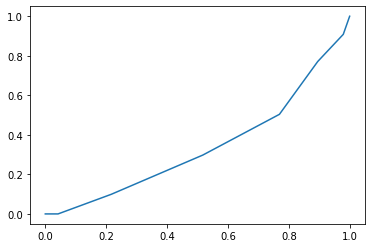

In [22]:
plt.plot(fpr,tpr)

In [23]:
roc_auc_score(y_test,m_prob)

0.6600384348475951

In [24]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_train_predict=reg.predict(X_train)
y_train_predict

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,

In [26]:
y_test_pred = reg.predict(X_test)
y_test_pred

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.70      0.86      0.77       447
           1       0.77      0.56      0.65       375

    accuracy                           0.72       822
   macro avg       0.74      0.71      0.71       822
weighted avg       0.73      0.72      0.72       822

              precision    recall  f1-score   support

           0       0.73      0.63      0.67       131
           1       0.70      0.79      0.74       143

    accuracy                           0.71       274
   macro avg       0.71      0.71      0.71       274
weighted avg       0.71      0.71      0.71       274



In [28]:
m_prob1 = reg.predict_proba(scaled_X_test)[:,1]
fpr1,tpr1,threshold1 = roc_curve(y_test,m_prob1,pos_label=1)

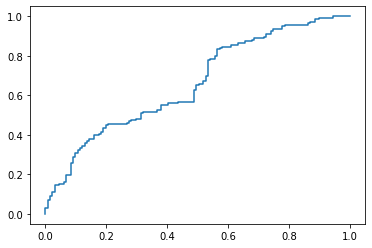

In [29]:
plt.plot(fpr1,tpr1)

In [30]:
#logistic
roc_auc_score(y_test,m_prob1)

0.6597448353173543

In [31]:
#KNN
roc_auc_score(y_test,m_prob)

0.6600384348475951